## ASTRY LUSIANA GINTING
### Batch 08

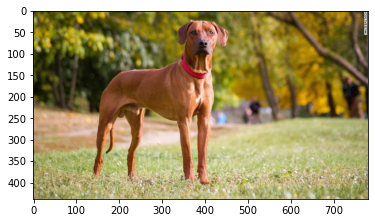

In [34]:
import numpy as np # import numpy sebagai np
import matplotlib.pyplot as plt #import matplotlib untuk memunculkan gambar dalam bentuk plot

image = plt.imread("data_set2/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg") # mengambil gambar dalam data set
plt.imshow(image) # memunculkan gambar

In [2]:
image #menunjukkan pixel value

array([[[ 86,  93,  39],
        [ 88,  93,  39],
        [ 87,  90,  33],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  10],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  25],
        ...,
        [ 46,  39,  13],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  25],
        [ 44,  37,   9],
        [ 70,  60,  33]],

       ...,

       [[165, 151, 106],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 139,  85],
        [149, 138,  84],
        [145, 134,  80]],

       [[164, 149, 106],
        [157, 142,  99],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  89],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [146, 131,  90],
        ...,
        [160, 148, 100],
        [157, 145,  97],
        [150, 138,  90]]

In [3]:
np_image = np.array(image) # mengubah gambar kedalam bentuk array
print(np_image.shape) # ukuran gambar 438 * 780 dengan 3 channel yaitu red, green, blue

(438, 780, 3)


In [4]:
Red = image[:,:,0] # memecah gambar ke dalam matriks red, mengambil semua ukuran gambar dengan slicing index ke 0
Green = image[:,:,1] # memecah gambar ke dalam matriks green, mengambil semua ukuran gambar dengan slicing index ke 1
Blue = image[:,:,2] # memecah gambar ke dalam matriks blue, mengambil semua ukuran gambar dengan slicing index ke 2

print("shape R :", Red.shape)
print("shape G :", Green.shape)
print("shape B :", Blue.shape)

shape R : (438, 780)
shape G : (438, 780)
shape B : (438, 780)


##### hal ini menunjukkan bahwa gambar terdiri dari tumpukan matriks red, green, blue

## Langkah-langkah untuk mendeteksi edge

### 1. Menghitung turunan parsial masing-masing pixel untuk sumbu x dan y

Text(0.5, 1.0, '$\\partial_y img$')

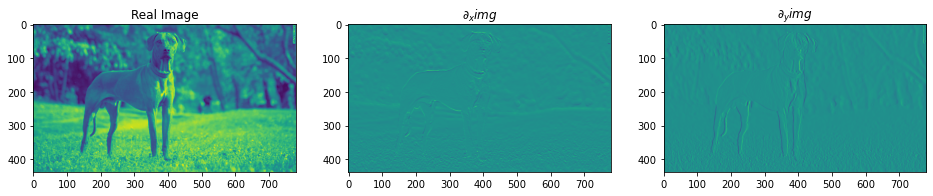

In [39]:
grey = 0.299*Red + 0.587*Green + 0.114*Blue # grey gabungan dari matriks red, green , blue

dx, dy = np.gradient(grey) # menghitung turunan parsial

fig, ax = plt.subplots(ncols=3,figsize=(16,5))
ax[0].imshow(grey) # menunjukkan gambar asli
ax[0].set_title('Real Image')
ax[1].imshow(dx) # menunjukkan gambar turunan dx
ax[1].set_title(r'$\partial_x img$')
ax[2].imshow(dy) # menunjukkan gambar turunan dy
ax[2].set_title(r'$\partial_y img$')

### 2. Hitung gradient magnitude tiap pixel

In [9]:
gradient_magnitude = np.sqrt((dx**2) + (dy**2))# menghitung gradient magnitude

In [26]:
gradient_magnitude

array([[  9.01984501,   9.65779131,   8.14811905, ...,   2.56468911,
         18.88161108,  25.55386468],
       [ 10.242     ,  10.30793102,   8.78140792, ...,   6.97657699,
          4.76523766,  27.49518871],
       [  8.75538806,   9.0101237 ,   7.91386304, ..., 107.28512147,
         15.15513236,  31.36270513],
       ...,
       [  6.51476487,   8.24805857,   9.75569067, ...,   2.34414259,
          2.85438369,   4.09511981],
       [  7.02762451,   8.42720453,   8.5482165 , ...,   5.00640273,
          5.38452117,   5.5863738 ],
       [  7.00371216,   9.00288754,   8.93786335, ...,   5.23781484,
          6.69745743,   7.4183513 ]])

(-0.5, 779.5, 437.5, -0.5)

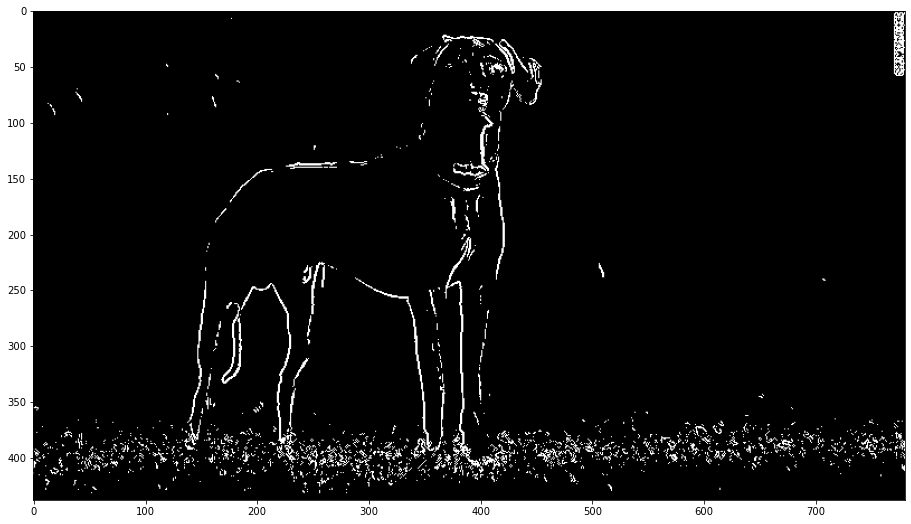

In [31]:
fig,ax = plt.subplots(1,1, figsize=(16,9))
ax.imshow(gradient_magnitude >= 30, cmap='gray')# mendeteksi edge gradient magnitude >= 30 nilai threshold, dengan warna grey
plt.axis('on') # menampilkan ukuran sumbu x dan y

(-0.5, 779.5, 437.5, -0.5)

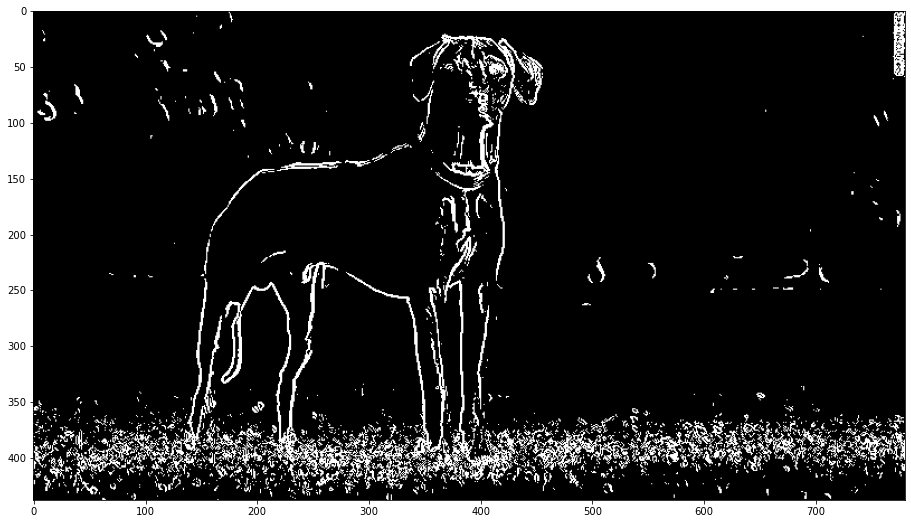

In [32]:
fig,ax = plt.subplots(1,1, figsize=(16,9))
ax.imshow(gradient_magnitude >= 20, cmap='gray')# mendeteksi edge gradient magnitude >= 20 nilai threshold, dengan warna grey
plt.axis('on') # menampilkan ukuran sumbu x dan y

(-0.5, 779.5, 437.5, -0.5)

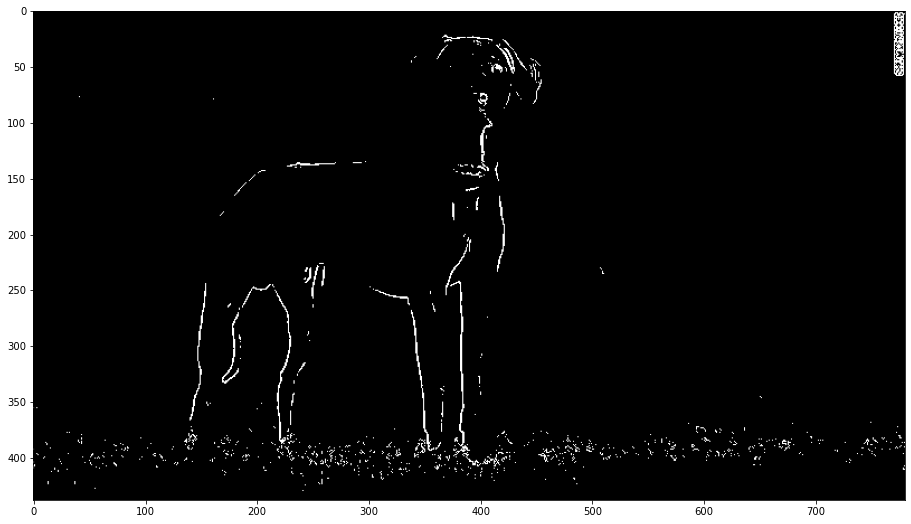

In [41]:
fig,ax = plt.subplots(1,1, figsize=(16,9))
ax.imshow(gradient_magnitude >= 40, cmap='gray')# mendeteksi edge gradient magnitude >= 40 nilai threshold, dengan warna grey
plt.axis('on') # menampilkan ukuran sumbu x dan y

#### kesimpulan : semakin besar nilai gradient magnitude dibandingkan nilai threshold, maka pendeteksian edge nya semakin jelas terlihat. hal ditunjukkan tepi gambar yang berwarna putih semakin jelas terlihat

### 4. Untuk operasi matriks, buat matriks dengan nilai apapun yang bersesuaian dengan ukuran gambar dan sesuai dengan aturan perkalian matriks.


In [35]:
Blue_t = Red.T # melakukan transpose blue agar matriks blue dapat dikalikan dengan matriks red
print(Blue_t)

[[ 86  77  64 ... 165 164 164]
 [ 88  77  66 ... 159 157 157]
 [ 87  78  68 ... 151 149 146]
 ...
 [ 48  46  56 ... 150 155 160]
 [ 46  64  44 ... 149 153 157]
 [ 59  37  70 ... 145 148 150]]


In [42]:
Red @ Blue_t # perkalian matriks red dengan blue transpose

array([[104,  56,  59, ..., 194, 129, 169],
       [ 56, 150, 105, ...,  17, 173, 176],
       [ 59, 105,  10, ..., 152, 159, 103],
       ...,
       [194,  17, 152, ..., 145,  82, 150],
       [129, 173, 159, ...,  82, 187, 127],
       [169, 176, 103, ..., 150, 127,  52]], dtype=uint8)

Text(0.5, 1.0, 'Gambar Red x Blue')

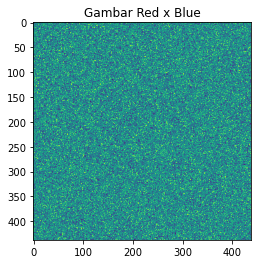

In [43]:
plt.imshow(Red @ Blue_t) # menampilkan hasil perkalian dalam bentuk gambar
plt.title("Gambar Red x Blue")

Text(0.5, 1.0, 'Gambar Green x Matrix')

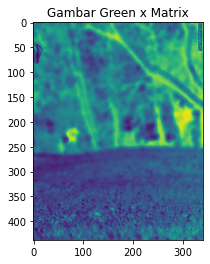

In [44]:
matrix = (-1)*np.eye(780)[:,438:] # memasukkan perkalian identitas
gm = Red @ matrix # hasil perkalian red dengan matriks
plt.imshow(gm) # menampilkan dalam bentuk gambar
plt.title('Gambar Green x Matrix')